In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,NaN,NaN,3.53370,0.469590,0.67908,NaN,2.79240,NaN,NaN,NaN,1.746400
1,-0.098505,-0.17857,2.06280,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.9236,0.772910,0.641450
2,-0.169460,0.50153,2.47090,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.5318,2.432800,1.876800
3,-0.136050,0.47279,0.58809,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.6593,0.618250,3.265800
4,0.098830,NaN,0.42970,NaN,NaN,NaN,0.37425,2.17860,1.31400,1.0632,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.57600,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.3255,3.231100,0.005387
796,NaN,-4.03460,3.10040,1.34610,1.377300,2.28870,NaN,NaN,NaN,NaN,2.461700,NaN
797,3.344800,-2.38430,2.03100,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.3433,1.622500,1.585300
798,3.441400,NaN,NaN,1.84400,1.098700,3.42430,NaN,3.72700,NaN,NaN,NaN,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	130
float64		column 2	185
float64		column 3	156
float64		column 4	133
float64		column 5	78
float64		column 6	133
float64		column 7	156
float64		column 8	211
float64		column 9	211
float64		column 10	130
float64		column 11	211
float64		column 12	156


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,670.000000,615.000000,644.000000,667.000000,722.000000,667.000000,644.000000,589.000000,589.000000,670.000000,589.000000,644.000000
mean,1.471315,1.234027,1.961164,1.941629,2.005666,1.973676,1.945786,2.032211,1.979084,1.955806,1.967224,1.961199
std,2.768259,3.615549,1.142131,1.169542,1.176770,1.145123,1.173573,1.159662,1.143894,1.152920,1.194680,1.116983
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.011923,0.010756,0.009369,0.002484,0.002000,0.000288
25%,-0.443138,-0.770010,1.005092,0.929395,0.997105,0.942110,0.929148,1.002800,1.043600,0.959348,0.861630,0.990685
50%,0.567605,0.564340,1.957300,1.922600,2.036500,1.971700,1.887900,2.054900,1.966400,1.958600,2.003500,1.938500
75%,3.987650,4.390700,2.886000,2.949950,3.020625,2.953900,2.955375,3.058300,2.979900,2.960750,3.055100,2.850675
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.988300,3.998800,3.990900,3.998300


<AxesSubplot:>

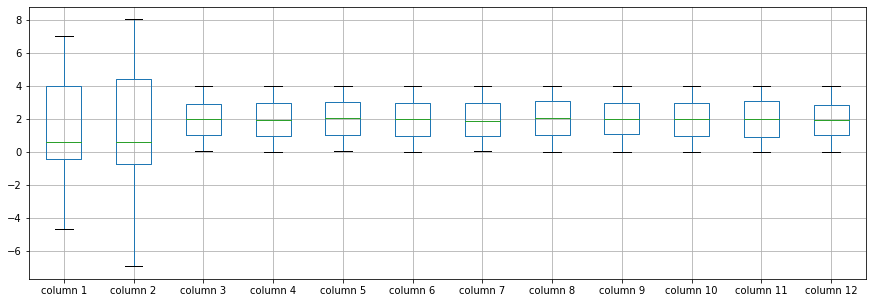

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.471315
column 2     1.234027
column 3     1.961164
column 4     1.941629
column 5     2.005666
column 6     1.973676
column 7     1.945786
column 8     2.032211
column 9     1.979084
column 10    1.955806
column 11    1.967224
column 12    1.961199
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.393833,-0.059233,-0.009685,0.015174,0.056990,-0.024275,0.020906,-0.033637,-0.016051,0.005326,0.006515
column 2,-0.393833,1.000000,-0.036134,-0.001574,-0.018533,-0.010024,0.050641,0.020338,0.044535,-0.026424,-0.099229,0.023655
column 3,-0.059233,-0.036134,1.000000,-0.044880,0.060621,0.038043,0.038778,-0.014147,0.015029,-0.000500,-0.061407,0.062245
column 4,-0.009685,-0.001574,-0.044880,1.000000,0.001827,-0.055653,0.001822,0.004242,-0.025095,0.072071,0.015116,-0.003981
column 5,0.015174,-0.018533,0.060621,0.001827,1.000000,0.066004,0.043997,0.024211,-0.038840,-0.005551,-0.009590,-0.001636
column 6,0.056990,-0.010024,0.038043,-0.055653,0.066004,1.000000,-0.110283,0.025380,-0.012708,-0.004590,-0.033749,-0.022264
column 7,-0.024275,0.050641,0.038778,0.001822,0.043997,-0.110283,1.000000,-0.099500,0.008228,-0.050225,-0.003514,-0.016236
column 8,0.020906,0.020338,-0.014147,0.004242,0.024211,0.025380,-0.099500,1.000000,-0.074416,-0.077808,-0.004064,-0.050053
column 9,-0.033637,0.044535,0.015029,-0.025095,-0.038840,-0.012708,0.008228,-0.074416,1.000000,0.061563,-0.004038,-0.012177
column 10,-0.016051,-0.026424,-0.000500,0.072071,-0.005551,-0.004590,-0.050225,-0.077808,0.061563,1.000000,-0.078315,0.075814


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+55,12+55+55,12+55+55,12+55+55+55+55,12+55+55+55,12+55+55,12+55,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.668229026794435
Epoch: 1 , loss: 23.48299545288086
Epoch: 2 , loss: 23.109794273376465
Epoch: 3 , loss: 20.884006538391112
Epoch: 4 , loss: 18.85689666748047
Epoch: 5 , loss: 18.30309211730957
Epoch: 6 , loss: 17.829075813293457
Epoch: 7 , loss: 17.641476097106935
Epoch: 8 , loss: 17.419170207977295
Epoch: 9 , loss: 17.054298191070558
Epoch: 10 , loss: 16.86624931335449
Epoch: 11 , loss: 16.777754611968994
Epoch: 12 , loss: 16.68257831573486
Epoch: 13 , loss: 16.680901927948
Epoch: 14 , loss: 16.448036251068114
Epoch: 15 , loss: 16.268324775695802
Epoch: 16 , loss: 16.316761093139647
Epoch: 17 , loss: 16.269951763153077
Epoch: 18 , loss: 16.1501482963562
Epoch: 19 , loss: 16.168861751556395
Epoch: 20 , loss: 16.03179084777832
Epoch: 21 , loss: 16.0692484664917
Epoch: 22 , loss: 16.038465557098387
Epoch: 23 , loss: 16.15395700454712
Epoch: 24 , loss: 15.99350061416626
Epoch: 25 , loss: 15.98008415222

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.051791
column 2     0.042845
column 3     3.034900
column 4     1.540830
column 5     2.475300
column 6     1.529493
column 7     1.670000
column 8     0.755510
column 9     1.532348
column 10    3.847400
column 11    1.506173
column 12    1.541817
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.391860,0.962085,0.000000,0.000000,0.000000,-2.436576,0.000000,-1.749886,-0.648279,-2.782648,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.335590,0.000000,-0.513487,-2.425069,-1.175172,0.000000,0.000000,0.000000,0.000000,0.051289,-1.074280
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
796,-2.340286,0.000000,0.000000,0.000000,0.000000,0.000000,1.189915,-0.746846,-0.865418,-0.044305,0.000000,0.393466
797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
798,0.000000,5.543993,-0.858545,0.000000,0.000000,0.000000,-0.126474,0.000000,-0.470475,-0.241728,-1.171463,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(80.770078668741, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.32539450969333017

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.553200,1.029436,3.533700,0.469590,0.679080,0.997824,2.792400,1.026414,1.050821,1.032952,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.178500,1.680200,1.388800,3.216700,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.921600,2.642400,1.518700,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.595700,2.893300,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.569770,0.429700,1.117713,1.129031,1.095928,0.374250,2.178600,1.314000,1.063200,1.078189,1.114120
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.803040,3.222900,3.493300,1.325500,3.231100,0.005387
796,1.126314,-4.034600,3.100400,1.346100,1.377300,2.288700,1.586045,1.649254,1.598082,1.623195,2.461700,1.620166
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.537000,1.225600,0.740270,2.495400,1.343300,1.622500,1.585300
798,3.441400,0.327693,0.718455,1.844000,1.098700,3.424300,0.684336,3.727000,0.717425,0.709392,0.713037,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AL_20(imp).xlsx", index=False, header=False)